In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from collections import Counter

In [12]:
df = pd.read_csv('spam.csv',encoding='iso-8859-1')

In [10]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [13]:
df.shape

(5572, 5)

In [ ]:
# 1. Data Cleaning
# 2. EDA
# 3. Text Pre-processing ( vectorization, removing stop words etc.)
# 4. Model building
# 5. Evaluations
# 6. Improvements depending on evaulations
# 7. Website development 

## 1. Data Cleaning

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
# The last 3 unnamed columns have many null and missing values. So we'll drop the last 3 columns


In [17]:
df.drop(columns=['Unnamed: 2','Unnamed: 3',"Unnamed: 4"],inplace = True)

In [18]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Renaming the columns since v1 and v2 is not very discriptive

In [19]:
df.rename(columns = {'v1':'target','v2':'text'},inplace = True)

In [20]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
df.target.value_counts()

ham     4825
spam     747
Name: target, dtype: int64

In [27]:
# converted the values of target column into 0 and 1
df.target = np.where(df.target =='ham',0,1)

In [28]:
df.target.value_counts()

0    4825
1     747
Name: target, dtype: int64

In [29]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [31]:
#checking missing value in dataframe
df.isnull().sum()

target    0
text      0
dtype: int64

In [32]:
# Checking duplicate values
df.duplicated().sum()

403

In [34]:
#remove duplicate values
df = df.drop_duplicates(keep='first')

In [36]:
df.duplicated().sum()

0

In [37]:
df.shape

(5169, 2)

## 2. Exploration Data Analysis (EDA)

In [38]:
# Checking the distribution of spam and non-spam SMSs. in our dataset
# Result shows that there are more non-spam SMSs. (0 states ham)
df.target.value_counts()

0    4516
1     653
Name: target, dtype: int64

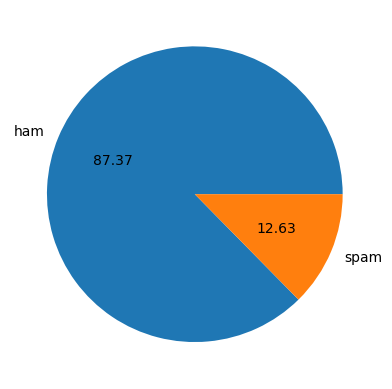

In [43]:
plt.pie(df.target.value_counts(),labels=['ham','spam'], autopct = "%0.2f")
plt.show()

In [44]:
# Above pie chart sttes that data is imbalanced because spam % is 12.63%, which is way less than ham


In [46]:
# next analysis will be counting the total charcaters, words and sentences in a SMS.
# SO, we will create 3 columns with these 3 details and use NLTK here

In [47]:
nltk.download('punkt') # to download all the dependencies

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\30063829\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [54]:
# length os text  means no of charctaers in that text
df['num_characters'] = df.text.apply(len)

In [55]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [56]:
# Fetching number of words

In [57]:
df.text.apply(lambda x:nltk.word_tokenize(x)) 
# word_tokenize will divide the text into words and make a list

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [59]:
df['num_words']= df.text.apply(lambda x:len(nltk.word_tokenize(x)))

In [60]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [61]:
df.text.apply(lambda x:nltk.sent_tokenize(x)) 
# sent_tokenize will divide the text into sentences and make a list

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [62]:
df['num_sentences']= df.text.apply(lambda x:len(nltk.sent_tokenize(x)))

In [63]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [64]:
df.num_characters.describe()

count    5169.000000
mean       78.977945
std        58.236293
min         2.000000
25%        36.000000
50%        60.000000
75%       117.000000
max       910.000000
Name: text, dtype: float64

In [66]:
df[["num_characters",'num_words','num_sentences']].describe()
# this will give analysis on whole dataset. 
# Eg. avg chars in 1 SMS are 78, avg words are 18 and avg sentences are 2

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [69]:
# analysis only on ham SMSs
df[df.target == 0][["num_characters",'num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [70]:
# analysis only on ham SMSs
df[df.target == 1][["num_characters",'num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [72]:
# Result =  Avg characters in spam messages are 137, whereas it is 70 in ham.
# Spam messages used more chars, words and sentences.
# similarly, no of chars and sentences in Spam are 27 and 3.
# rough analysis = spam SMSs are longer than ham

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

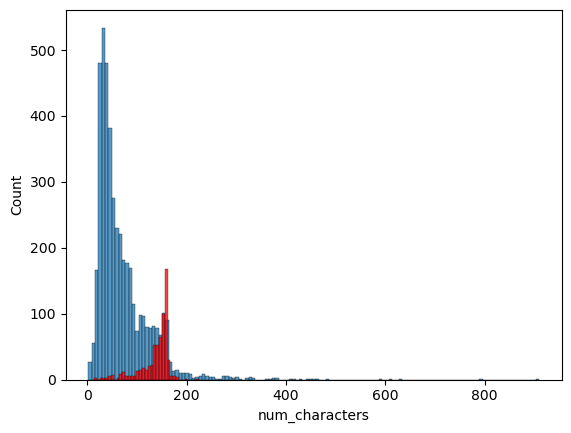

In [76]:
# Histogram representaion for number of chars in both spam and ham
sns.histplot(df[df.target == 0]["num_characters"])
sns.histplot(df[df.target == 1]["num_characters"], color = 'red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

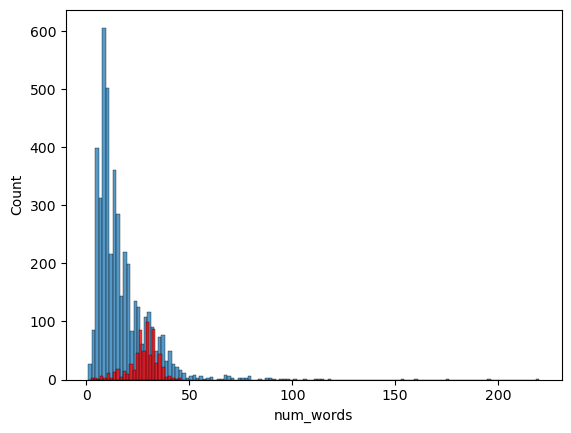

In [78]:
# Histogram representaion for number of words in both spam and ham
sns.histplot(df[df.target == 0]["num_words"])
sns.histplot(df[df.target == 1]["num_words"], color = 'red')

<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

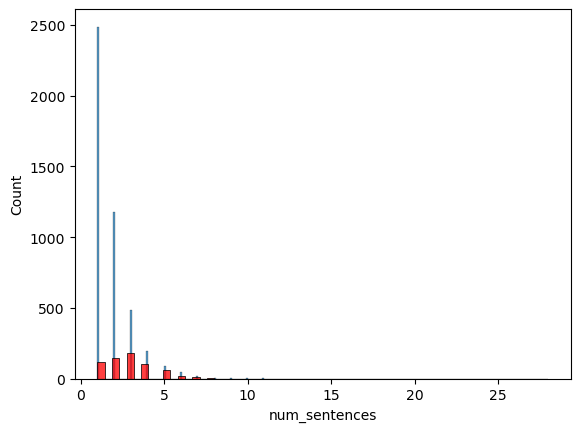

In [80]:
# Histogram representaion for number of sentences in both spam and ham
sns.histplot(df[df.target == 0]["num_sentences"])
sns.histplot(df[df.target == 1]["num_sentences"], color = 'red')

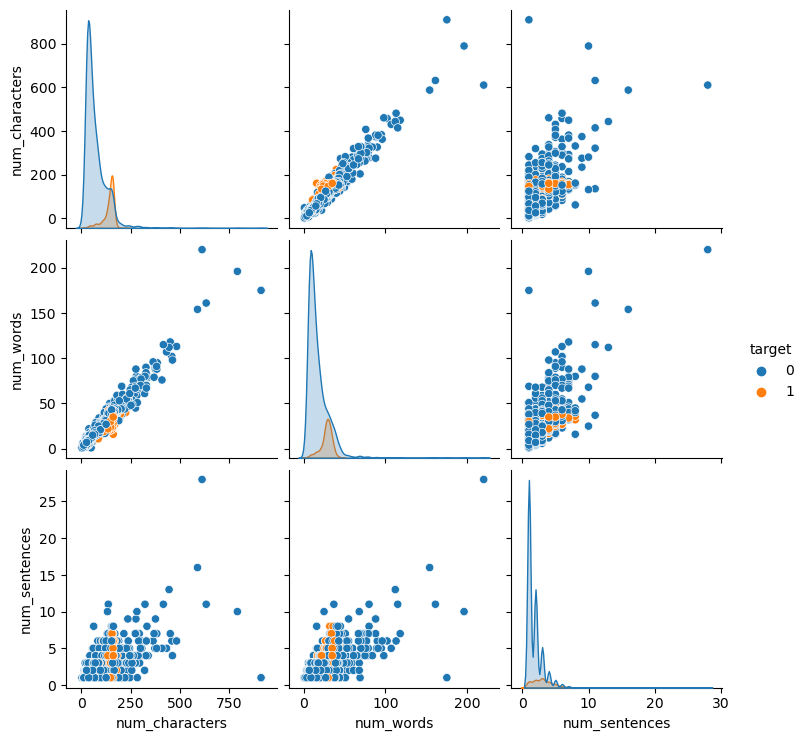

In [82]:
# Let us find the relationship between these 3 columns
sns.pairplot(df,hue='target')

In [83]:
# Result - there are outliers and the relation is almost linear in all 3 columns.

In [85]:
# Corelation coefficient 
df.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262984,0.284901
num_characters,0.384717,1.000000,0.965770,0.638143
num_words,0.262984,0.965770,1.000000,0.684541
num_sentences,0.284901,0.638143,0.684541,1.000000


<AxesSubplot:>

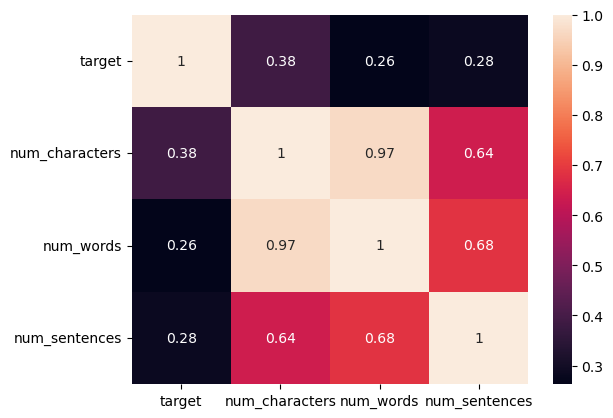

In [87]:
sns.heatmap(df.corr(),annot=True)

In [88]:
# Result of Heatmap
# there s high relation b/q no of sent and no of charc(0.64)
# high relation b/w no of sent and no of words (0.68)
# very high relation b/w no of charcs and no of words(0.97)
#So, we can keep only one column from these 3.
# We'll keep no of chars , because it has high variation with target variable (0.38)


## 3. Data Preprocessing
 . Lower case <br>
 . Tokenization <br>
 . Removing special characters <br>
 . Removing Stop words and punctuations <br>
 . Stemming <br>

In [132]:
def transform_text(text):
    text = text.lower() # lower case
    text = nltk.word_tokenize(text) # tokenization
    y=[]
    for i in text: # Removing special characters and keeping only alphanumeric values
        if i.isalnum():
            y.append(i)
    #Removing stopwords
    text = y[:] # clong the y list into text
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i) 
    # Stemming
    text = y[:] # clong the y list into text again
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [112]:
# nltk.download()
# nltk.download('stopwords')

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\30063829\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [114]:
#  stopwords in english. So this code is removing the unwanted words from text
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [115]:
# punctuation marks. So, we are removign the punctuations from text
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [135]:
# Sample result of transform function
transform_text('Hi Guys, I loved making the Project on ML? ')

'hi guy love make project ml'

In [131]:
# Sample example of Stemming 
ps = PorterStemmer()
ps.stem('doing')

'do'

In [137]:
# transforming the text column as per transform function and saving the result into new column
df['transformed_text'] = df['text'].apply(transform_text)

In [138]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [140]:
#pip install wordcloud


     ------------------------------------ 153.1/153.1 kB 909.7 kB/s eta 0:00:00


In [145]:
# making wordcloud of Spam messages
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [150]:
spam_wc= wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

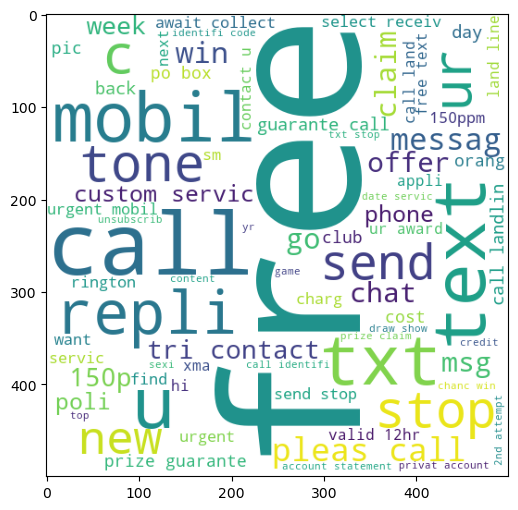

In [151]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)


In [ ]:
# Result of wordcloud = the very common words in any Spam SMSs are free, 
# mobile, call ,chat etc.
# Let us check the same for Ham messages

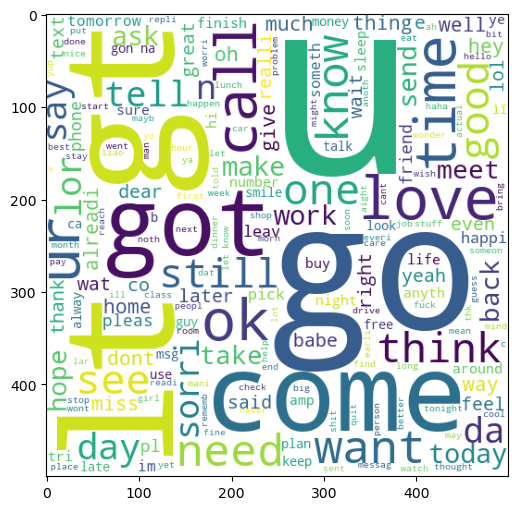

In [152]:
ham_wc= wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)


In [156]:
# Let us find the top 30 words for Spam SMSs.
spam_corpus=[]
for msg in (df[df['target']==1]['transformed_text'].tolist()):
    for word in msg.split():
        spam_corpus.append(word)
    

In [157]:
len(spam_corpus)

9939

In [161]:
pip install collections

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections


In [164]:
# these are most common 30 words in spam corpus
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

C:\Users\30063829\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


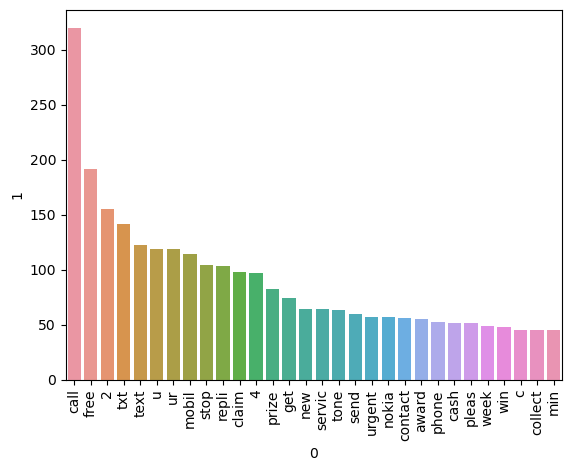

In [167]:
# visualization of the same, by loading the counter data in dataframe
# words on x-axis, count on y-axis
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [168]:
#building  Ham corpus and visualising it.
# Let us find the top 30 words for both Ham SMSs.
ham_corpus=[]
for msg in (df[df['target']==0]['transformed_text'].tolist()):
    for word in msg.split():
        ham_corpus.append(word)
    

In [169]:
len(ham_corpus) # Since Ham messages are more than Spam

35394

C:\Users\30063829\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


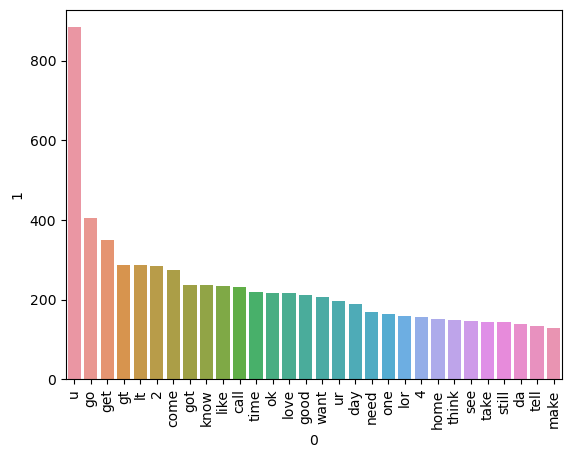

In [170]:
# visualization of the same, by loading the counter data in dataframe
# words on x-axis, count on y-axis
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# 4. Model Building

Vectorization done using Bag of Words

In [385]:
# vectorize the transformed text because Machine Learning models accpet only numerical data
# Using BOW technique here
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [386]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [387]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [388]:
X.shape

(5169, 6708)

In [389]:
y = df['target'].values

In [390]:
y.shape

(5169,)

In [391]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [392]:
# split the data in train test in 80-20 ratio, with seed value as 2
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [187]:
# Importing 3 Naive Bayes algorithms. 
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score

In [193]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [194]:
# fitting Gaussian Naive Bayes algo
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [195]:
# fitting Multinomial Naive Bayes algo
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [196]:
# fitting Bernoulli Naive Bayes algo
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [ ]:
# Result - Precision score and accuracy, both are maximum for Bernoulli algorithm 

Vectorization done using TF-IDF

In [438]:
# vectorize the transformed text because Machine Learning models accpet only numerical data
# Using tf-idf technique here
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [492]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [493]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [494]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [495]:
y = df['target'].values

In [496]:
# split the neewly generated data again in train test in 80-20 ratio, with seed value as 2
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [361]:
# fitting Gaussian Naive Bayes algo on tfidf train data
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [497]:
# fitting Multinomial Naive Bayes algo on tfidf vectors
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [339]:
# fitting Bernoulli Naive Bayes algo on tfidf vectors
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [340]:
# Result = Precision score for multinomial Naive Bayes is 1.0, which is better from all3 algos.
# However, the accuracy of multinomial is less than Bernoulli. But precision score matters more. 
# Hence, Multinomial Naive Bayes is considered as best model using tfidf vectorization.

In [464]:
# Compare multinomial Naive Bayes with other classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [465]:
# Objects of each classifier
lrc = LogisticRegression(solver='liblinear',penalty ='l1')
svc = SVC(kernel='sigmoid', gamma = 0.1)
dtc = DecisionTreeClassifier(max_depth=5)
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
mnb = MultinomialNB()


In [466]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy,precision

In [365]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9110251450676983, 0.9791666666666666)

In [345]:
clfs = [lrc,svc,dtc,knc,rfc] # list of all models

In [346]:
accuracy = []
precision = []
for model in clfs:
    curr_accuracy,curr_precision = train_classifier(model,X_train,y_train,X_test,y_test)
    print("Accuracy :",curr_accuracy)
    print("Precision :",curr_precision)
    accuracy.append(curr_accuracy)
    precision.append(curr_precision)
    

Accuracy : 0.9584139264990329
Precision : 0.9702970297029703
Accuracy : 0.9294003868471954
Precision : 0.9710144927536232
Accuracy : 0.9294003868471954
Precision : 0.8282828282828283


C:\Users\30063829\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy : 0.9052224371373307
Precision : 1.0
Accuracy : 0.9748549323017408
Precision : 0.9827586206896551


In [467]:
# Using Dictionaory instead of List for all models 
# creating dictionary where key = model name, value = objects
clfs = {
    'LRC':lrc,
    'SVC' : svc,
    'DTC':dtc,
    'KNC':knc,
    'RFC':rfc,
    'NB': mnb
}

In [468]:
accuracy = []
precision = []
for model,obj in clfs.items():
    curr_accuracy,curr_precision = train_classifier(obj,X_train,y_train,X_test,y_test)
    print("For :",model)
    print("Accuracy :",curr_accuracy)
    print("Precision :",curr_precision)
    accuracy.append(curr_accuracy)
    precision.append(curr_precision)
    

For : LRC
Accuracy : 0.9671179883945842
Precision : 0.9642857142857143
For : SVC
Accuracy : 0.9700193423597679
Precision : 0.9819819819819819
For : DTC
Accuracy : 0.9294003868471954
Precision : 0.8282828282828283


C:\Users\30063829\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


For : KNC
Accuracy : 0.9052224371373307
Precision : 0.9761904761904762
For : RFC
Accuracy : 0.9748549323017408
Precision : 0.9827586206896551
For : NB
Accuracy : 0.9787234042553191
Precision : 0.9461538461538461


In [469]:
#performance_scaled_df = pd.DataFrame({'Algorithms':clfs.keys(),'Accuracy_scaling':accuracy,'Precision_scaling':precision})

In [470]:
#performance_scaled_df

,Algorithms,Accuracy_scaling,Precision_scaling
0,LRC,0.967118,0.964286
1,SVC,0.970019,0.981982
2,DTC,0.929400,0.828283
3,KNC,0.905222,0.976190
4,RFC,0.974855,0.982759
5,NB,0.978723,0.946154


In [457]:
performance_df_new = pd.DataFrame({'Algorithms':clfs.keys(),'Accuracy_max_feature':accuracy,'Precision_max_feature':precision})

In [458]:
performance_df_new

,Algorithms,Accuracy_max_feature,Precision_max_feature
0,LRC,0.958414,0.970297
1,SVC,0.929400,0.971014
2,DTC,0.931335,0.825243
3,KNC,0.905222,1.000000
4,RFC,0.974855,0.982759
5,NB,0.970986,1.000000


In [447]:
performance_df = pd.DataFrame({'Algorithms':clfs.keys(),'Accuracy':accuracy,'Precision':precision})

In [448]:
performance_df

,Algorithms,Accuracy,Precision
0,LRC,0.951644,0.940000
1,SVC,0.911025,0.979167
2,DTC,0.936170,0.846154
3,KNC,0.900387,1.000000
4,RFC,0.973888,1.000000
5,NB,0.959381,1.000000


In [459]:
performance_df = performance_df.merge(performance_df_new,on='Algorithms')

In [460]:
performance_df

,Algorithms,Accuracy,Precision,Accuracy_max_feature,Precision_max_feature
0,LRC,0.951644,0.940000,0.958414,0.970297
1,SVC,0.911025,0.979167,0.929400,0.971014
2,DTC,0.936170,0.846154,0.931335,0.825243
3,KNC,0.900387,1.000000,0.905222,1.000000
4,RFC,0.973888,1.000000,0.974855,0.982759
5,NB,0.959381,1.000000,0.970986,1.000000


In [471]:
# performance_df = performance_df.merge(performance_scaled_df,on='Algorithms')
# performance_df

,Algorithms,Accuracy,Precision,Accuracy_max_feature,Precision_max_feature,Accuracy_scaling,Precision_scaling
0,LRC,0.951644,0.940000,0.958414,0.970297,0.967118,0.964286
1,SVC,0.911025,0.979167,0.929400,0.971014,0.970019,0.981982
2,DTC,0.936170,0.846154,0.931335,0.825243,0.929400,0.828283
3,KNC,0.900387,1.000000,0.905222,1.000000,0.905222,0.976190
4,RFC,0.973888,1.000000,0.974855,0.982759,0.974855,0.982759
5,NB,0.959381,1.000000,0.970986,1.000000,0.978723,0.946154


In [355]:
#Result - Naive Bayes, KNC and RFC- they all have 1 precision score. 
# Now let us compare the accuracy of these 3.and there is not much diff in accuracies.
# we'll go for Naive Bayes.

Model Improvement
1. Change the max_features parameters of tfIdf

In [491]:
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
# Let us run all the classifier models on the new vectors
# Run the code from tfidf object till dataframe building.
# No need to write the same code again.
# Result After applying max_features -
# Accuracy for Naive Bayes has increased from 95.9% to 97.09%. 
# However, there is not much difference in other's accuracy.


2. Apply scaling on Vectors and see the difference in accurcay and precision score.

In [ ]:
# Vectors will hold only 0 to 1 between values. 
# used MinMaxScaler instead of StandardScaler since StandardScaler will give -ve values also.
# Executing the whole code again after scalign the data.
# NOt writing the code again. 

In [ ]:
# Result after Scaling- 
# for NB - Scaling increased the accuracy, but it has decreased the precision.
# for other algos - no significant difference in either of accurcay or precision.
# Decision - I will not use scaling in my project. Commented out all scaling code.
# Run above code again.

3. Create Voting Classifier

In [472]:
# Voting classifier(Soft) from top best performing classifiers
from sklearn.ensemble import VotingClassifier
svc = SVC(kernel='sigmoid',gamma = 0.1,probability=True)
mnb = MultinomialNB()
knc = KNeighborsClassifier()

In [479]:
voting = VotingClassifier(estimators=[('SVC',svc),('MNB',mnb),('KNC',knc)],voting='soft')

In [480]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('SVC',
                              SVC(gamma=0.1, kernel='sigmoid',
                                  probability=True)),
                             ('MNB', MultinomialNB()),
                             ('KNC', KNeighborsClassifier())],
                 voting='soft')

In [481]:
y_pred = voting.predict(X_test)

In [482]:
print("Accuracy :",accuracy_score(y_pred,y_test))

Accuracy : 0.9796905222437138


In [483]:
print("Precision:",precision_score(y_pred,y_test))

Precision: 0.855072463768116


In [484]:
# The result of Voting classifier is not very good. Precision has reduced.

4. Apply Stacking because all classifiers are heterogenous.

In [485]:
estimators=[('SVC',svc),('MNB',mnb),('KNC',knc)]
final_estimator = RandomForestClassifier() # Meta model

In [486]:
from sklearn.ensemble import StackingClassifier

In [487]:
clf = StackingClassifier(estimators= estimators, final_estimator=final_estimator)

In [488]:
clf.fit(X_train,y_train)

StackingClassifier(estimators=[('SVC',
                                SVC(gamma=0.1, kernel='sigmoid',
                                    probability=True)),
                               ('MNB', MultinomialNB()),
                               ('KNC', KNeighborsClassifier())],
                   final_estimator=RandomForestClassifier())

In [489]:
y_pred = clf.predict(X_test)
print("Accuracy :",accuracy_score(y_pred,y_test))
print("Precision:",precision_score(y_pred,y_test))

Accuracy : 0.9806576402321083
Precision: 0.8985507246376812


In [490]:
# Result of stacking classifier is also not very effective. 

### 7. Creating Pipeline and website development

In [499]:
# Wehenver I receive any Email, I should pre-process the text then vectorize it and after that apply model.
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb')) # With max_parameteres enabled
pickle.dump(mnb,open('model.pkl','wb'))